In [ ]:
#![LaSPACE_logo.jpg](attachment:LaSPACE_logo.jpg)

This version of the Notebook (.v5) combines the datasets for the following instruments at the same observation time:
- Solar Energetic Particle (SEP)
- Solar Wind Ion Analyzer (SWIA)
- Solar Wind Electron Analyzer (SWEA)
- SupraThermal and Thermal Ion Composition (STATIC)
- Langmuir Probe and Waves (LPW)
- Neutral Gas and Ion Mass Spectrometer (NGIMS)



# Making NASA’s Open-Innovation Data More Machine-Learning Friendly: A Case for the MAVEN Datasets

## LURA Project 2020-2021


LURA Project Title: "Making NASA's Open-Innovation Data More Machine-Learning Friendly: A Case for the MAVEN Datasets" <br> This research grant was awarded by the Louisiana Space Grant Consortium (LaSPACE). URL: https://laspace.lsu.edu/about-us/. <br> LaSPACE Grant Number: ##---TBA---##, Primary NASA Grant Number: 80NSSC20M0110.


Project P.I.: Dr. Dhan Lord B. Fortela <br> Apprentice Student: Ashton C. Fremin <br> Department of Chemical Engineering, University of Louisiana at Lafayette, URL: https://chemical.louisiana.edu/


Recent Notebook Revision: 23 June 2021


## Notebook Overview:

This Jupyter Notebook is running Python shows that step-by-step workflow from the download to the analysis of the MAVEN datasets.

The PyDIVIDE package is used to download the MAVEN datasets and to perform som graphical analysis of the data. It was created by the MAVEN Team at the University of Colorado - Boulder: https://github.com/MAVENSDC/Pydivide. It is main used in this project to download and read the datasets.

The Self-Organizing Map (SOM) package is available from this GitHub repository: https://github.com/sevamoo/SOMPY.git.

## Install the PyDIVIDE package:

In [ ]:
pip install pydivide # no need to run if pydivide is already installed, just import (next line)

## Import the Python Packages:

In [ ]:
import pydivide 
import matplotlib.pylab as plt
import matplotlib
%matplotlib inline
import pandas as pd
import numpy as np
from time import time
import sompy
import random
from sklearn.externals import joblib
import glob

## Download MAVEM Data from NASA Datacenter:

Download the target MAVEN dataset into the local directory. This may take minutes depending on the netwrok speed.

After running the code line below, you do not have to run it again; unless you are downloading from another time period.


The download function allows for the specification of destination folder using the 'local_dir=path' argument.

In [ ]:
pydivide.download_files(start_date='2018-05-15',
                              end_date='2018-06-30',
                              local_dir='/Users/dhan-lordfortela/Documents/EIL/Proposals/LURA 2020/LURA 2020 - Grant Awarded/LURA_2020 - Working/FINAL_works',
                              insitu=True,
                               iuvs=False)

## Extract the raw data to working dataset


Reading the downloaded datset. The 'pydivide.read' function reads the data from the local folder specified above.

In [ ]:
insitu= pydivide.read(['2018-05-15', '2018-06-30'],insitu_only=True)

Check the Keys of the data array. These Keys pertain to the instruments and other aspects of the MAVEN spacecraft like the position (Orbit, SPACECRAFT) and time stamps.

In [ ]:
insitu.keys()

### We will focus on the SWEA subset of the data:

In [ ]:
insitu_LPW = insitu.get("LPW")
insitu_SWEA = insitu.get("SWEA")
insitu_SWIA = insitu.get("SWIA")
insitu_STATIC = insitu.get("STATIC")
insitu_SEP = insitu.get("SEP")
insitu_NGIMS = insitu.get("NGIMS")

In [ ]:
insitu_SWEA.head()

In [ ]:
insitu_SWEA.count()

In [ ]:
# remove NaN or few-entry columns
insitu_SWEA_bkp=insitu_SWEA # create back-up copy
insitu_SWEA.drop("SOLAR_WIND_ELECTRON_DENSITY_QUAL", axis=1, inplace=True)
insitu_SWEA.drop("SOLAR_WIND_ELECTRON_TEMPERATURE_QUAL", axis=1, inplace=True)
insitu_SWEA.drop("Electron eflux  Parallel (5-100 ev) Quality", axis=1, inplace=True)
insitu_SWEA.drop("Electron eflux  Parallel (100-500 ev) Quality", axis=1, inplace=True)
insitu_SWEA.drop("Electron eflux  Parallel (500-1000 ev) Quality", axis=1, inplace=True)
insitu_SWEA.drop("Electron eflux  Anti-par (5-100 ev) Quality", axis=1, inplace=True)
insitu_SWEA.drop("Electron eflux  Anti-par (100-500 ev) Quality", axis=1, inplace=True)
insitu_SWEA.drop("Electron eflux  Anti-par (500-1000 ev) Quality", axis=1, inplace=True)
insitu_SWEA.drop("ELECTRON_SPECTRUM_SHAPE_PARAMETER_QUAL", axis=1, inplace=True)

Check the number of data to see which variables must be omitted. Also remove the 'Quality' variables.

In [ ]:
insitu_LPW.count()

In [ ]:
# remove NaN or few-entry columns
insitu_LPW_bkp=insitu_LPW # create back-up copy
insitu_LPW.drop("ELECTRON_SPECTRUM_SHAPE_PARAMETER_QUAL", axis=1, inplace=True)

In [ ]:
insitu_SWEA.count()

In [ ]:
insitu_SWIA.count()

In [ ]:
insitu_STATIC.count()

In [ ]:
insitu_SEP.count()

In [ ]:
insitu_NGIMS.count()

## Merging the datasets based on timestamp:

- SEP + SWEA

In [ ]:
print(insitu_SEP.count(axis=1))
print(insitu_SWEA.count(axis=1))

In [ ]:
SEP_SWEA = insitu_SEP.merge(insitu_SWEA, left_index=True, right_index=True)

In [ ]:
print(SEP_SWEA.count(axis=1))

In [ ]:
SEP_SWEA.head()

In [ ]:
SEP_SWEA_SWIA = SEP_SWEA.merge(insitu_SWIA, left_index=True, right_index=True)

In [ ]:
print(SEP_SWEA_SWIA.count(axis=0))

In [ ]:
SEP_SWEA_SWIA.head()

In [ ]:
SEP_SWEA_SWIA_LPW = SEP_SWEA_SWIA.merge(insitu_LPW, left_index=True, right_index=True)

In [ ]:
print(SEP_SWEA_SWIA_LPW.count(axis=0))

In [ ]:
SEP_SWEA_SWIA_LPW.head()

In [ ]:
SEP_SWEA_SWIA_LPW_NGIMS = SEP_SWEA_SWIA_LPW.merge(insitu_NGIMS, left_index=True, right_index=True)

In [ ]:
print(SEP_SWEA_SWIA_LPW_NGIMS.count(axis=1))

In [ ]:
SEP_SWEA_SWIA_LPW_NGIMS_STATIC = SEP_SWEA_SWIA_LPW_NGIMS.merge(insitu_STATIC, left_index=True, right_index=True)

In [ ]:
print(SEP_SWEA_SWIA_LPW_NGIMS_STATIC.count(axis=0))

In [ ]:
index=SEP_SWEA_SWIA_LPW_NGIMS_STATIC.index
print(index)

In [ ]:
SEP_SWEA_SWIA_LPW_NGIMS_STATIC.to_excel('Data_SEP_SWEA_SWIA_LPW_NGIMS_STATIC.xlsx')

Remove the last column as it has no data:

In [ ]:
insitu_SWEA= insitu_SWEA.iloc[: , 0:-1]

In [ ]:
insitu_SWEA.head()

Remove observations with missing entries:

In [ ]:
insitu_SWEA.isnull().sum()

In [ ]:
insitu_SWEA_clean = insitu_SWEA.dropna()

In [ ]:
insitu_SWEA_clean.count()

In [ ]:
insitu_SWEA_clean.head()

Saving the extracted SWEA data as '.xlsx. file for other use:

In [ ]:
insitu_SWEA_clean.to_excel('Data_SWEA.xlsx')

## Import the MAVEN Data:

Trying the MAVEN data. We will import the saved spreadsheet file. Make sure to check the columns in the file and remove the time-date column before using the dataset for SOM training.


In [5]:
#-- Uncomment the line below if using the dataframe just created above
#MAVEN_data = insitu_SWEA_clean
#
#
#-- Uncomment the line below if loading the saved spreadsheet from local directory
MAVEN_data_timeSeries = pd.read_excel('/Users/dhan-lordfortela/Documents/EIL/Proposals/LURA 2020/LURA 2020 - Grant Awarded/LURA_2020 - Working/FINAL_works/on_MAVEN_data/Data_SEP_SWEA_SWIA_LPW_NGIMS_STATIC.xlsx')


Examine the structure of the data:

In [6]:
MAVEN_data_timeSeries.head()

,Unnamed: 0,ION_ENERGY_FLUX__FOV_1_F,ION_ENERGY_FLUX__FOV_1_F_QUAL,ION_ENERGY_FLUX__FOV_1_R,ION_ENERGY_FLUX__FOV_1_R_QUAL,ION_ENERGY_FLUX__FOV_2_F,ION_ENERGY_FLUX__FOV_2_F_QUAL,ION_ENERGY_FLUX__FOV_2_R,ION_ENERGY_FLUX__FOV_2_R_QUAL,ELECTRON_ENERGY_FLUX___FOV_1_F,...,HPLUS_CHARACTERISTIC_DIRECTION_MSO_X,HPLUS_CHARACTERISTIC_DIRECTION_MSO_Y,HPLUS_CHARACTERISTIC_DIRECTION_MSO_Z,HPLUS_CHARACTERISTIC_ANGULAR_WIDTH,HPLUS_CHARACTERISTIC_ANGULAR_WIDTH_QUAL,DOMINANT_PICKUP_ION_CHARACTERISTIC_DIRECTION_MSO_X,DOMINANT_PICKUP_ION_CHARACTERISTIC_DIRECTION_MSO_Y,DOMINANT_PICKUP_ION_CHARACTERISTIC_DIRECTION_MSO_Z,DOMINANT_PICKUP_ION_CHARACTERISTIC_ANGULAR_WIDTH,DOMINANT_PICKUP_ION_CHARACTERISTIC_ANGULAR_WIDTH_QUAL
0,2018-05-15T00:00:00,NaN,NaN,NaN,NaN,7.86,5.20,6.02,5.20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-15T00:00:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-15T00:00:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-15T00:00:24,17.6,5.82,4.63,5.82,NaN,NaN,NaN,NaN,2.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-15T00:00:32,11.1,5.41,3.48,5.41,12.70,5.52,3.94,5.52,3.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove the time-date column (first column).

In [ ]:
MAVEN_data.head()

Make sure the data types are correct. All of the SWEA variables (after removing the date-time) should be 'float64' data type.

In [ ]:
MAVEN_data.count()

In [ ]:
MAVEN_data.astype('float64').dtypes

Check the number of observations.

Extract thge Column names to be used for component plane rendering:

In [ ]:
component_names=list(MAVEN_data.columns)
print(component_names)

Remove the 'Quality' variable since it is a standard deviation of the measurements:

In [7]:
MAVEN_data_noQUAL = MAVEN_data_timeSeries.drop(['ION_ENERGY_FLUX__FOV_1_F_QUAL', 
                                     'ION_ENERGY_FLUX__FOV_1_R_QUAL', 
                                     'ION_ENERGY_FLUX__FOV_2_F_QUAL', 
                                     'ION_ENERGY_FLUX__FOV_2_R_QUAL', 
                                     'ELECTRON_ENERGY_FLUX___FOV_1_F_QUAL', 
                                     'ELECTRON_ENERGY_FLUX___FOV_1_R_QUAL', 
                                     'ELECTRON_ENERGY_FLUX___FOV_2_F_QUAL', 
                                     'ELECTRON_ENERGY_FLUX___FOV_2_R_QUAL', 
                                     'HPLUS_FLOW_VELOCITY_MSO_X_QUAL',
                                     'HPLUS_FLOW_VELOCITY_MSO_Y_QUAL', 
                                     'HPLUS_FLOW_VELOCITY_MSO_Z_QUAL',
                                     'HPLUS_TEMPERATURE_QUAL_x', 
                                     'SOLAR_WIND_DYNAMIC_PRESSURE_QUAL', 
                                     'ELECTRON_DENSITY_QUAL_MIN', 
                                     'ELECTRON_DENSITY_QUAL_MAX', 
                                     'ELECTRON_TEMPERATURE_QUAL_MIN', 
                                     'ELECTRON_TEMPERATURE_QUAL_MAX', 
                                     'SPACECRAFT_POTENTIAL_QUAL_MIN', 
                                     'SPACECRAFT_POTENTIAL_QUAL_MAX', 
                                     'EWAVE_LOW_FREQ_QUAL_QUAL',
                                     'EWAVE_MID_FREQ_QUAL_QUAL', 
                                     'EWAVE_HIGH_FREQ_QUAL_QUAL',
                                     'HE_DENSITY_PRECISION', 
                                     'HE_DENSITY_QUAL', 
                                     'O_DENSITY_PRECISION', 
                                     'O_DENSITY_QUAL', 
                                     'CO_DENSITY_PRECISION', 
                                     'CO_DENSITY_QUAL', 
                                     'N2_DENSITY_PRECISION', 
                                     'N2_DENSITY_QUAL',
                                     'NO_DENSITY_PRECISION', 
                                     'NO_DENSITY_QUAL', 
                                     'AR_DENSITY_PRECISION', 
                                     'AR_DENSITY_QUAL',
                                     'CO2_DENSITY_PRECISION', 
                                     'CO2_DENSITY_QUAL',  
                                     'O2PLUS_DENSITY_PRECISION', 
                                     'O2PLUS_DENSITY_QUAL_x', 
                                     'CO2PLUS_DENSITY_PRECISION', 
                                     'CO2PLUS_DENSITY_QUAL', 
                                     'NOPLUS_DENSITY_PRECISION', 
                                     'NOPLUS_DENSITY_QUAL', 
                                     'OPLUS_DENSITY_PRECISION', 
                                     'OPLUS_DENSITY_QUAL_x', 
                                     'CO2PLUS_N2PLUS_DENSITY_PRECISION', 
                                     'CO2PLUS_N2PLUS_DENSITY_QUAL', 
                                     'CPLUS_DENSITY_PRECISION', 
                                     'CPLUS_DENSITY_QUAL', 
                                     'OHPLUS_DENSITY_PRECISION', 
                                     'OHPLUS_DENSITY_QUAL', 
                                     'NPLUS_DENSITY_PRECISION', 
                                     'NPLUS_DENSITY_QUAL', 
                                     'STATIC_QUALITY_FLAG', 
                                     'HPLUS_DENSITY_QUAL_y', 
                                     'OPLUS_DENSITY_QUAL_y', 
                                     'O2PLUS_DENSITY_QUAL_y', 
                                     'HPLUS_TEMPERATURE_QUAL_y', 
                                     'OPLUS_TEMPERATURE_QUAL', 
                                     'O2PLUS_TEMPERATURE_QUAL', 
                                     'O2PLUS_FLOW_VELOCITY_MAVEN_APP_X_QUAL', 
                                     'O2PLUS_FLOW_VELOCITY_MAVEN_APP_Y_QUAL', 
                                     'O2PLUS_FLOW_VELOCITY_MAVEN_APP_Z_QUAL', 
                                     'O2PLUS_FLOW_VELOCITY_MSO_X_QUAL', 
                                     'O2PLUS_FLOW_VELOCITY_MSO_Y_QUAL', 
                                     'O2PLUS_FLOW_VELOCITY_MSO_Z_QUAL', 
                                     'HPLUS_CHARACTERISTIC_ENERGY_QUAL', 
                                     'HEPLUS_CHARACTERISTIC_ENERGY_QUAL', 
                                     'OPLUS_CHARACTERISTIC_ENERGY_QUAL', 
                                     'O2PLUS_CHARACTERISTIC_ENERGY_QUAL', 
                                     'HPLUS_CHARACTERISTIC_ANGULAR_WIDTH_QUAL', 
                                     'DOMINANT_PICKUP_ION_CHARACTERISTIC_ANGULAR_WIDTH_QUAL',
                                
                    # Also remove variables that are have too many null or None values:
                                     'DOMINANT_PICKUP_ION_CHARACTERISTIC_ANGULAR_WIDTH',
                                     'DOMINANT_PICKUP_ION_CHARACTERISTIC_DIRECTION_MSO_Z',
                                     'DOMINANT_PICKUP_ION_CHARACTERISTIC_DIRECTION_MSO_Y',
                                     'DOMINANT_PICKUP_ION_CHARACTERISTIC_DIRECTION_MSO_X',
                                     'HPLUS_CHARACTERISTIC_ANGULAR_WIDTH',
                                                'HPLUS_CHARACTERISTIC_DIRECTION_MSO_Z',
                                                'HPLUS_CHARACTERISTIC_DIRECTION_MSO_Y',
                                                'HPLUS_CHARACTERISTIC_DIRECTION_MSO_X',
                                                'O2PLUS_CHARACTERISTIC_ENERGY',
                                                'O2PLUS_OMNI_DIRECTIONAL_FLUX',
                                                'OPLUS_CHARACTERISTIC_ENERGY',
                                                'OPLUS_OMNI_DIRECTIONAL_FLUX',
                                                'HEPLUS_CHARACTERISTIC_ENERGY',
                                                'HEPLUS_OMNI_DIRECTIONAL_FLUX',
                                                'HPLUS_CHARACTERISTIC_ENERGY',
                                                'HPLUS_OMNI_DIRECTIONAL_FLUX',
                                                'O2PLUS_FLOW_VELOCITY_MSO_Z',
                                                'O2PLUS_FLOW_VELOCITY_MSO_Y',
                                                'O2PLUS_FLOW_VELOCITY_MSO_X',
                                                'O2PLUS_FLOW_VELOCITY_MAVEN_APP_Z',
                                                'O2PLUS_FLOW_VELOCITY_MAVEN_APP_Y',
                                                'O2PLUS_FLOW_VELOCITY_MAVEN_APP_X',
                                                'O2PLUS_TEMPERATURE',
                                                'OPLUS_TEMPERATURE',
                                                'HPLUS_TEMPERATURE_y',
                                                'O2PLUS_DENSITY_y',
                                                'OPLUS_DENSITY_y',
                                                'HPLUS_DENSITY_y',
                                                'NPLUS_DENSITY',
                                                'NO_DENSITY',
                                                'EWAVE_HIGH_FREQ',
                                                'EWAVE_MID_FREQ',
                                                'EWAVE_LOW_FREQ',
                                                'OHPLUS_DENSITY',
                                                'CPLUS_DENSITY',
                                                'CO2PLUS_N2PLUS_DENSITY',
                                                'OPLUS_DENSITY_x',
                                                'NOPLUS_DENSITY',
                                                'CO2PLUS_DENSITY',
                                                'O2PLUS_DENSITY_x',
                                                'CO2_DENSITY',
                                                'AR_DENSITY',
                                                'N2_DENSITY',
                                                'CO_DENSITY',
                                                'O_DENSITY',
                                                'HE_DENSITY',
                                                'ELECTRON_ANTI_PARALLEL_FLUX_HIGH',
                                                'ELECTRON_PARALLEL_FLUX_HIGH'
                                                
                                            
                                               ], axis='columns', inplace=False)

In [8]:
MAVEN_data_noQUAL.count()

Unnamed: 0                           539292
ION_ENERGY_FLUX__FOV_1_F             538926
ION_ENERGY_FLUX__FOV_1_R             538926
ION_ENERGY_FLUX__FOV_2_F             538767
ION_ENERGY_FLUX__FOV_2_R             538767
ELECTRON_ENERGY_FLUX___FOV_1_F       538926
ELECTRON_ENERGY_FLUX___FOV_1_R       538926
ELECTRON_ENERGY_FLUX___FOV_2_F       538767
ELECTRON_ENERGY_FLUX___FOV_2_R       538767
LOOK_DIRECTION_1_F_MSO_X             539246
LOOK_DIRECTION_1_F_MSO_Y             539246
LOOK_DIRECTION_1_F_MSO_Z             539246
LOOK_DIRECTION_1_R_MSO_X             539246
LOOK_DIRECTION_1_R_MSO_Y             539246
LOOK_DIRECTION_1_R_MSO_Z             539246
LOOK_DIRECTION_2_F_MSO_X             539246
LOOK_DIRECTION_2_F_MSO_Y             539246
LOOK_DIRECTION_2_F_MSO_Z             539246
LOOK_DIRECTION_2_R_MSO_X             539246
LOOK_DIRECTION_2_R_MSO_Y             539246
LOOK_DIRECTION_2_R_MSO_Z             539246
SOLAR_WIND_ELECTRON_DENSITY          431784
SOLAR_WIND_ELECTRON_TEMPERATURE 

In [9]:
MAVEN_data_noQUAL.isnull().sum()

Unnamed: 0                                0
ION_ENERGY_FLUX__FOV_1_F                366
ION_ENERGY_FLUX__FOV_1_R                366
ION_ENERGY_FLUX__FOV_2_F                525
ION_ENERGY_FLUX__FOV_2_R                525
ELECTRON_ENERGY_FLUX___FOV_1_F          366
ELECTRON_ENERGY_FLUX___FOV_1_R          366
ELECTRON_ENERGY_FLUX___FOV_2_F          525
ELECTRON_ENERGY_FLUX___FOV_2_R          525
LOOK_DIRECTION_1_F_MSO_X                 46
LOOK_DIRECTION_1_F_MSO_Y                 46
LOOK_DIRECTION_1_F_MSO_Z                 46
LOOK_DIRECTION_1_R_MSO_X                 46
LOOK_DIRECTION_1_R_MSO_Y                 46
LOOK_DIRECTION_1_R_MSO_Z                 46
LOOK_DIRECTION_2_F_MSO_X                 46
LOOK_DIRECTION_2_F_MSO_Y                 46
LOOK_DIRECTION_2_F_MSO_Z                 46
LOOK_DIRECTION_2_R_MSO_X                 46
LOOK_DIRECTION_2_R_MSO_Y                 46
LOOK_DIRECTION_2_R_MSO_Z                 46
SOLAR_WIND_ELECTRON_DENSITY          107508
SOLAR_WIND_ELECTRON_TEMPERATURE 

In [10]:
MAVEN_data_noNA = MAVEN_data_noQUAL.dropna()

In [11]:
MAVEN_data_noNA.count()

Unnamed: 0                           57832
ION_ENERGY_FLUX__FOV_1_F             57832
ION_ENERGY_FLUX__FOV_1_R             57832
ION_ENERGY_FLUX__FOV_2_F             57832
ION_ENERGY_FLUX__FOV_2_R             57832
ELECTRON_ENERGY_FLUX___FOV_1_F       57832
ELECTRON_ENERGY_FLUX___FOV_1_R       57832
ELECTRON_ENERGY_FLUX___FOV_2_F       57832
ELECTRON_ENERGY_FLUX___FOV_2_R       57832
LOOK_DIRECTION_1_F_MSO_X             57832
LOOK_DIRECTION_1_F_MSO_Y             57832
LOOK_DIRECTION_1_F_MSO_Z             57832
LOOK_DIRECTION_1_R_MSO_X             57832
LOOK_DIRECTION_1_R_MSO_Y             57832
LOOK_DIRECTION_1_R_MSO_Z             57832
LOOK_DIRECTION_2_F_MSO_X             57832
LOOK_DIRECTION_2_F_MSO_Y             57832
LOOK_DIRECTION_2_F_MSO_Z             57832
LOOK_DIRECTION_2_R_MSO_X             57832
LOOK_DIRECTION_2_R_MSO_Y             57832
LOOK_DIRECTION_2_R_MSO_Z             57832
SOLAR_WIND_ELECTRON_DENSITY          57832
SOLAR_WIND_ELECTRON_TEMPERATURE      57832
ELECTRON_PA

In [12]:
MAVEN_data_noNA.isnull().sum()

Unnamed: 0                           0
ION_ENERGY_FLUX__FOV_1_F             0
ION_ENERGY_FLUX__FOV_1_R             0
ION_ENERGY_FLUX__FOV_2_F             0
ION_ENERGY_FLUX__FOV_2_R             0
ELECTRON_ENERGY_FLUX___FOV_1_F       0
ELECTRON_ENERGY_FLUX___FOV_1_R       0
ELECTRON_ENERGY_FLUX___FOV_2_F       0
ELECTRON_ENERGY_FLUX___FOV_2_R       0
LOOK_DIRECTION_1_F_MSO_X             0
LOOK_DIRECTION_1_F_MSO_Y             0
LOOK_DIRECTION_1_F_MSO_Z             0
LOOK_DIRECTION_1_R_MSO_X             0
LOOK_DIRECTION_1_R_MSO_Y             0
LOOK_DIRECTION_1_R_MSO_Z             0
LOOK_DIRECTION_2_F_MSO_X             0
LOOK_DIRECTION_2_F_MSO_Y             0
LOOK_DIRECTION_2_F_MSO_Z             0
LOOK_DIRECTION_2_R_MSO_X             0
LOOK_DIRECTION_2_R_MSO_Y             0
LOOK_DIRECTION_2_R_MSO_Z             0
SOLAR_WIND_ELECTRON_DENSITY          0
SOLAR_WIND_ELECTRON_TEMPERATURE      0
ELECTRON_PARALLEL_FLUX_LOW           0
ELECTRON_PARALLEL_FLUX_MID           0
ELECTRON_ANTI_PARALLEL_FL

In [13]:
MAVEN_data_noNA.to_excel('Data_MAVEN_data_noQUAL_noNA.xlsx')

In [22]:
MAVEN_data_huge = MAVEN_data_noNA.iloc[:,1:]

In [47]:
MAVEN_data_huge.head()

,ION_ENERGY_FLUX__FOV_1_F,ION_ENERGY_FLUX__FOV_1_R,ION_ENERGY_FLUX__FOV_2_F,ION_ENERGY_FLUX__FOV_2_R,ELECTRON_ENERGY_FLUX___FOV_1_F,ELECTRON_ENERGY_FLUX___FOV_1_R,ELECTRON_ENERGY_FLUX___FOV_2_F,ELECTRON_ENERGY_FLUX___FOV_2_R,LOOK_DIRECTION_1_F_MSO_X,LOOK_DIRECTION_1_F_MSO_Y,...,HPLUS_DENSITY_x,HPLUS_DENSITY_QUAL_x,HPLUS_FLOW_VELOCITY_MSO_X,HPLUS_FLOW_VELOCITY_MSO_Y,HPLUS_FLOW_VELOCITY_MSO_Z,HPLUS_TEMPERATURE_x,SOLAR_WIND_DYNAMIC_PRESSURE,ELECTRON_DENSITY,ELECTRON_TEMPERATURE,SPACECRAFT_POTENTIAL
10,4.40,6.25,7.41,6.94,5.10,2.08,2.56,4.40,0.707,0.331,...,1.09,1.0,-237.0,27.40,-47.4,53.8,0.108,0.756,4790.0,0.000069
976,9.49,8.10,8.56,3.93,3.24,3.24,4.16,3.24,0.707,-0.706,...,9.95,1.0,-489.0,-1.65,118.0,190.0,4.250,0.309,9690.0,1.110000
1064,9.96,9.72,2.78,3.01,1.62,2.32,3.71,4.63,0.707,-0.332,...,7.95,1.0,-378.0,-29.80,81.0,167.0,2.020,0.647,7890.0,0.433000
1070,6.25,5.33,7.64,5.56,4.16,4.39,3.71,6.95,0.707,-0.330,...,11.50,1.0,-396.0,-41.50,102.0,155.0,3.260,0.553,2280.0,0.000002
1077,5.56,5.32,9.03,4.16,2.54,5.56,4.63,4.86,0.707,-0.330,...,8.23,1.0,-388.0,-57.50,80.1,166.0,2.210,0.492,8860.0,0.000020


In [48]:
MAVEN_data_huge.count()

ION_ENERGY_FLUX__FOV_1_F             57832
ION_ENERGY_FLUX__FOV_1_R             57832
ION_ENERGY_FLUX__FOV_2_F             57832
ION_ENERGY_FLUX__FOV_2_R             57832
ELECTRON_ENERGY_FLUX___FOV_1_F       57832
ELECTRON_ENERGY_FLUX___FOV_1_R       57832
ELECTRON_ENERGY_FLUX___FOV_2_F       57832
ELECTRON_ENERGY_FLUX___FOV_2_R       57832
LOOK_DIRECTION_1_F_MSO_X             57832
LOOK_DIRECTION_1_F_MSO_Y             57832
LOOK_DIRECTION_1_F_MSO_Z             57832
LOOK_DIRECTION_1_R_MSO_X             57832
LOOK_DIRECTION_1_R_MSO_Y             57832
LOOK_DIRECTION_1_R_MSO_Z             57832
LOOK_DIRECTION_2_F_MSO_X             57832
LOOK_DIRECTION_2_F_MSO_Y             57832
LOOK_DIRECTION_2_F_MSO_Z             57832
LOOK_DIRECTION_2_R_MSO_X             57832
LOOK_DIRECTION_2_R_MSO_Y             57832
LOOK_DIRECTION_2_R_MSO_Z             57832
SOLAR_WIND_ELECTRON_DENSITY          57832
SOLAR_WIND_ELECTRON_TEMPERATURE      57832
ELECTRON_PARALLEL_FLUX_LOW           57832
ELECTRON_PA

In [32]:
# eliminating some columns/variables
MAVEN_data = MAVEN_data_huge.drop(['LOOK_DIRECTION_1_F_MSO_X',
                                     'LOOK_DIRECTION_1_F_MSO_Y',
                                     'LOOK_DIRECTION_1_F_MSO_Z',
                                     'LOOK_DIRECTION_1_R_MSO_X',
                                     'LOOK_DIRECTION_1_R_MSO_Y',
                                     'LOOK_DIRECTION_1_R_MSO_Z',
                                     'LOOK_DIRECTION_2_F_MSO_X',
                                     'LOOK_DIRECTION_2_F_MSO_Y',
                                     'LOOK_DIRECTION_2_F_MSO_Z',
                                     'LOOK_DIRECTION_2_R_MSO_X',
                                     'LOOK_DIRECTION_2_R_MSO_Y',
                                     'LOOK_DIRECTION_2_R_MSO_Z',
                                     'HPLUS_DENSITY_QUAL_x',
                                     'HPLUS_FLOW_VELOCITY_MSO_X',
                                     'HPLUS_FLOW_VELOCITY_MSO_Y',
                                     'HPLUS_FLOW_VELOCITY_MSO_X'],
                                    axis='columns',
                                    inplace=False)

In [52]:
MAVEN_data = MAVEN_data_huge.iloc[:,20:]

In [53]:
MAVEN_data.head()

,SOLAR_WIND_ELECTRON_DENSITY,SOLAR_WIND_ELECTRON_TEMPERATURE,ELECTRON_PARALLEL_FLUX_LOW,ELECTRON_PARALLEL_FLUX_MID,ELECTRON_ANTI_PARALLEL_FLUX_LOW,ELECTRON_ANTI_PARALLEL_FLUX_MID,ELECTRON_SPECTRUM_SHAPE_PARAMETER,HPLUS_DENSITY_x,HPLUS_DENSITY_QUAL_x,HPLUS_FLOW_VELOCITY_MSO_X,HPLUS_FLOW_VELOCITY_MSO_Y,HPLUS_FLOW_VELOCITY_MSO_Z,HPLUS_TEMPERATURE_x,SOLAR_WIND_DYNAMIC_PRESSURE,ELECTRON_DENSITY,ELECTRON_TEMPERATURE,SPACECRAFT_POTENTIAL
10,15.7,27.0,104000000.0,71400000.0,96000000.0,62000000.0,4.235,1.09,1.0,-237.0,27.40,-47.4,53.8,0.108,0.756,4790.0,0.000069
976,12.8,14.3,116000000.0,4050000.0,98800000.0,3850000.0,3.608,9.95,1.0,-489.0,-1.65,118.0,190.0,4.250,0.309,9690.0,1.110000
1064,13.3,14.7,94900000.0,2240000.0,113000000.0,5430000.0,3.921,7.95,1.0,-378.0,-29.80,81.0,167.0,2.020,0.647,7890.0,0.433000
1070,19.4,15.6,126000000.0,5690000.0,145000000.0,6850000.0,3.822,11.50,1.0,-396.0,-41.50,102.0,155.0,3.260,0.553,2280.0,0.000002
1077,15.1,16.3,106000000.0,4590000.0,137000000.0,14400000.0,3.854,8.23,1.0,-388.0,-57.50,80.1,166.0,2.210,0.492,8860.0,0.000020


In [61]:
MAVEN_data.isnull().sum()

SOLAR_WIND_ELECTRON_DENSITY        0
SOLAR_WIND_ELECTRON_TEMPERATURE    0
ELECTRON_PARALLEL_FLUX_LOW         0
ELECTRON_ANTI_PARALLEL_FLUX_LOW    0
HPLUS_DENSITY_x                    0
HPLUS_TEMPERATURE_x                0
SOLAR_WIND_DYNAMIC_PRESSURE        0
ELECTRON_DENSITY                   0
ELECTRON_TEMPERATURE               0
SPACECRAFT_POTENTIAL               0
dtype: int64

In [60]:
MAVEN_data.drop(['ELECTRON_SPECTRUM_SHAPE_PARAMETER',
                                     'ELECTRON_ANTI_PARALLEL_FLUX_MID',
                                     'ELECTRON_PARALLEL_FLUX_MID',
                                     ],
                                    axis='columns',
                                    inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Training the SOM on the dataset

We have to set the size of the SOM to be [row,col], but we will do that using a prescribed 'Optimal Map Size' according to theory. Set the other SOM parameters in the argument.

As the data is relatively high, the model takes some time to train. We didn't finetune the hyperparameters of the algorithm and this is a potential improvement topic.

Calculate the theorerical optimal map size of the SOM model. You need to specify as argument the lattice type ('rect' or 'hex').

In [62]:
map_size = sompy.SOMFactory().build(MAVEN_data.values).calculate_map_size('rect')
print("Optimal Map Size (row, column):" + str(map_size))

Optimal Map Size (row, column):[14, 86]


Train the SOM model. The map size calculated above is automtically used in the training:

In [63]:
%%time
# Train the model with different parameters. 
# The more, the better. 

som = sompy.SOMFactory().build(MAVEN_data.values, 
                                   mapsize=map_size,
                                   normalization = 'var', 
                                   initialization='random', 
                                   #component_names=component_names, 
                                   lattice='rect')
som.train(n_job=1, train_rough_len=5, train_finetune_len=10) # change the number of iteration of rouhg_len and finetune _len

 Training...
 random_initialization took: 0.002000 seconds
 Rough training...
 radius_ini: 29.000000 , radius_final: 4.833333, trainlen: 5

 epoch: 1 ---> elapsed time:  1.540000, quantization error: 14.843574

 epoch: 2 ---> elapsed time:  1.525000, quantization error: 2.596818

 epoch: 3 ---> elapsed time:  1.434000, quantization error: 2.138170

 epoch: 4 ---> elapsed time:  1.437000, quantization error: 1.897305

 epoch: 5 ---> elapsed time:  1.530000, quantization error: 1.711163

 Finetune training...
 radius_ini: 7.166667 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  1.427000, quantization error: 1.335085

 epoch: 2 ---> elapsed time:  1.426000, quantization error: 1.471970

 epoch: 3 ---> elapsed time:  1.443000, quantization error: 1.393734

 epoch: 4 ---> elapsed time:  1.637000, quantization error: 1.327791

 epoch: 5 ---> elapsed time:  1.431000, quantization error: 1.259165

 epoch: 6 ---> elapsed time:  1.420000, quantization error: 1.186864

 epoc

CPU times: user 38.6 s, sys: 3.09 s, total: 41.7 s
Wall time: 22.4 s


Calculate the SOM model Topographic error and Quantization error:

In [64]:
topographic_error = som.calculate_topographic_error()
quantization_error = som.calculate_quantization_error()
print ("Topographic error = %s\n Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.0
 Quantization error = 0.17860731486850615


## Results 

### Components plane 

The components map shows the values of the variables for each prototype and allows us to extract conclusions consisting of non-linear patterns between variables. We have represented 2 types of components maps.
- The **prototypes visualization**: it shows the patterns learned by the neural network which are used to determine de winning neuron of each training instance
- The **real visualization** with exogeneous variables: it shows the real average value of the components of each lattice element. This visualization should be used with 2 purposes: (i) compare it with the prototypes visualization to assess how good is the prototypes modeling and (ii) to add other exogeneous variables (those which have not been used to build the self organizing map) in order to study their relation with the endogeneous variables.

If the quantization error is not very high and a proper visual assessment has been done assuring that the prototypes and real visualizations look very alike, the prototypes visualization can be used as a final product, since it is much visual appealing.

#### Prototypes component plane

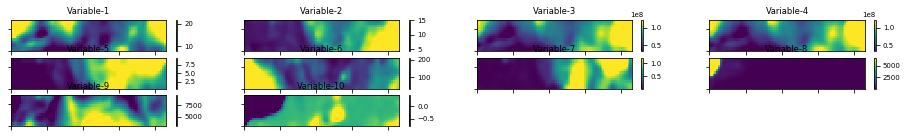

In [65]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(som, col_sz=4, which_dim="all", cmap='jet', denormalize=True)
plt.show()

Showing selected components. Select components by specifying the index in 'which_dim=[...]' argument.

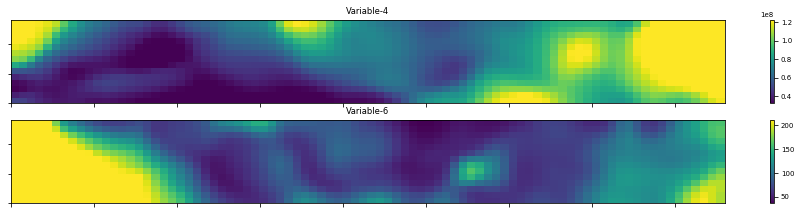

In [67]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(som, col_sz=1, which_dim=[3,5], cmap='viridis', denormalize=True)
plt.show()

### Hits-map 

This visualization is very important because it shows how the instances/observations/rawd ata are spreaded across the SOM lattice. The more instances lay into a cell, the more instances it is representing and hence the more we have to take it into acount.

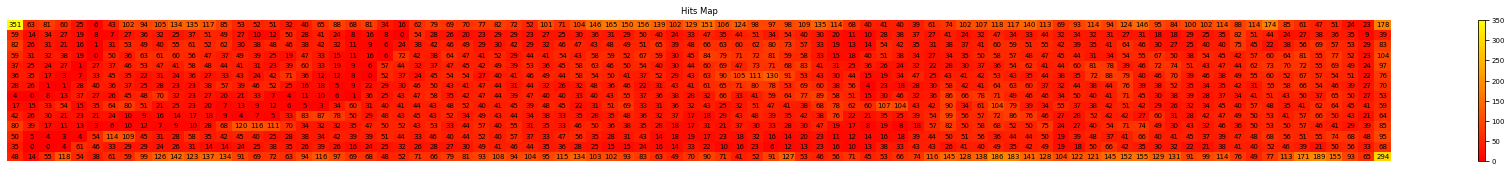

In [68]:
from sompy.visualization.bmuhits import BmuHitsView
#sm.codebook.lattice="rect"
vhts  = BmuHitsView(31,59,"Hits Map",text_size=7)
vhts.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn", logaritmic=False)
plt.show()

### Clustering 

This visualization helps us to focus on the groups which share similar characteristics

/opt/anaconda3/lib/python3.7/site-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


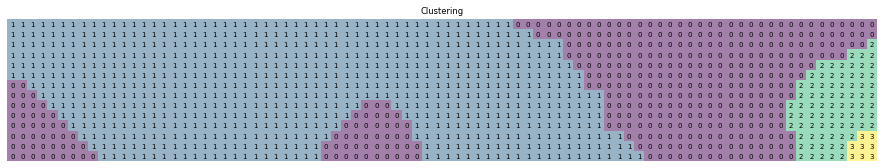

In [69]:
from sompy.visualization.hitmap import HitMapView
som.cluster(4)
map_labels=som.cluster(4)

hits  = HitMapView(30, 59,"Clustering",text_size=10, cmap=plt.cm.jet)
a=hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

Render the U-matrix of the SOM:

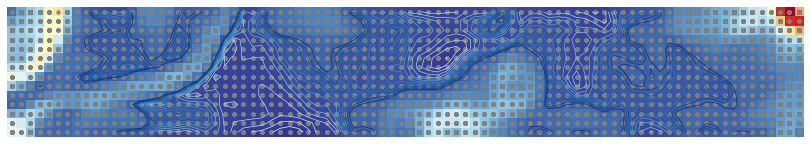

In [70]:
u = sompy.umatrix.UMatrixView(30, 59, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)


Retrieveing the clustered data:

In [71]:
## Create a new dataframe of the Raw Data to add the BMU and Cluester to

MAVEN_data_SOM = MAVEN_data

## Retrieve the BMUs of each Raw Data

BMU=som._bmu[0]
MAVEN_data_SOM['BMU']=BMU
MAVEN_data_SOM.astype({'BMU': 'int64'}).dtypes

#MAVEN_data_SOM.dtypes

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


SOLAR_WIND_ELECTRON_DENSITY        float64
SOLAR_WIND_ELECTRON_TEMPERATURE    float64
ELECTRON_PARALLEL_FLUX_LOW         float64
ELECTRON_ANTI_PARALLEL_FLUX_LOW    float64
HPLUS_DENSITY_x                    float64
HPLUS_TEMPERATURE_x                float64
SOLAR_WIND_DYNAMIC_PRESSURE        float64
ELECTRON_DENSITY                   float64
ELECTRON_TEMPERATURE               float64
SPACECRAFT_POTENTIAL               float64
BMU                                  int64
dtype: object

In [72]:
## Creating a dictionary to relate Raw Data BMU to Cluster of the BMU:
keys_bmu = list(pd.Series(range(0,len(map_labels))))
values_clust =  list(map_labels)
bmu_clust = {keys_bmu[i]: values_clust[i] for i in range(len(keys_bmu))}
#print(len(keys_bmu))
#print(len(bmu_clust))
#print(len(values_clust))
#print(bmu_clust) #uncomment this to check the resulting dicitonary

Map the Cluster to the Raw Data using the BMU-Cluster dictionary above:

In [73]:
MAVEN_data_SOM['Cluster']=""
MAVEN_data_SOM['Cluster']=MAVEN_data_SOM['BMU'].map(bmu_clust)

MAVEN_data_SOM.head() #uncomment to check the resulting dataframe

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SOLAR_WIND_ELECTRON_DENSITY,SOLAR_WIND_ELECTRON_TEMPERATURE,ELECTRON_PARALLEL_FLUX_LOW,ELECTRON_ANTI_PARALLEL_FLUX_LOW,HPLUS_DENSITY_x,HPLUS_TEMPERATURE_x,SOLAR_WIND_DYNAMIC_PRESSURE,ELECTRON_DENSITY,ELECTRON_TEMPERATURE,SPACECRAFT_POTENTIAL,BMU,Cluster
10,15.7,27.0,104000000.0,96000000.0,1.09,53.8,0.108,0.756,4790.0,0.000069,1194.0,0
976,12.8,14.3,116000000.0,98800000.0,9.95,190.0,4.250,0.309,9690.0,1.110000,75.0,0
1064,13.3,14.7,94900000.0,113000000.0,7.95,167.0,2.020,0.647,7890.0,0.433000,830.0,0
1070,19.4,15.6,126000000.0,145000000.0,11.50,155.0,3.260,0.553,2280.0,0.000002,249.0,0
1077,15.1,16.3,106000000.0,137000000.0,8.23,166.0,2.210,0.492,8860.0,0.000020,418.0,0


Also, check the concept of assigning 'clustering variables' before SOM training. The Air Flight data seems to have used 'clustering variables' before SOM training. Check this paper (already downloaded): https://ieeexplore.ieee.org/document/1199016

## Discussion of Results

Now that we have clustered the Raw Data based on the trained SOM, we can now look into each group of data and discuss the patterns in each.

Graphical rendering of the variables in each cluster helps in examining the trends.

### Subset the Raw Data according to Cluster

Use now the original time-series MAVEN data and add the BMU and Cluster data columns:

In [74]:
# create a new DataFrame from the MAVEN-timeSeries
# this dedicated daraframe has the time-date, BMU and Cluster
MAVEN_data_timeSeries_SOM=MAVEN_data_timeSeries
MAVEN_data_timeSeries_SOM['BMU']=""
MAVEN_data_timeSeries_SOM['Cluster']=""

# add the BMU data column
MAVEN_data_timeSeries_SOM['BMU']=BMU

# map the Cluster to each raw data
MAVEN_data_timeSeries_SOM['Cluster']=MAVEN_data_timeSeries_SOM['BMU'].map(bmu_clust)

ValueError: Length of values does not match length of index

Create a dataframe for each Cluster:

In [ ]:
Cluster_0 = MAVEN_data_timeSeries_SOM[MAVEN_data_timeSeries_SOM["Cluster"].isin([0])]
Cluster_1 = MAVEN_data_timeSeries_SOM[MAVEN_data_timeSeries_SOM["Cluster"].isin([1])]
Cluster_2 = MAVEN_data_timeSeries_SOM[MAVEN_data_timeSeries_SOM["Cluster"].isin([2])]
Cluster_3 = MAVEN_data_timeSeries_SOM[MAVEN_data_timeSeries_SOM["Cluster"].isin([3])]

# check the length(no. of observations) of each cluster:
print("Cluster 0 No. Obs.: " + str(len(Cluster_0)))
print("Cluster 1 No. Obs.: " + str(len(Cluster_1)))
print("Cluster 2 No. Obs.: " + str(len(Cluster_2)))
print("Cluster 3 No. Obs.: " + str(len(Cluster_3)))

In [ ]:
# make sure subsetting is corretcly done; check the 'Cluster' column data/last column
Cluster_2

Now that the observations are grouped based on SOM clusters:
- use descriptive stats tools such as histogram, x-y scatter, etc.
- use PyDivide visual analysis tools together with the 'date-time' information from the SOM clusters to find explanations for grouping of observations.

### Using the variable "Electron eflux  Parallel (100-500 ev) Quality":

- the U-matix shows that the region of distinct values are close to the Cluster 3 region
- based on the U-matrix and the cluster plots of the SOM, the variable that is intense at Cluster 3 is variable "Electron eflux  Parallel (100-500 ev) Quality"
- So,let us examine the variabale "Electron eflux  Parallel (100-500 ev) Quality"
- The histogram plots are not easy to distingush from this graph. Try separating the plots at the same x-axis range.

In [ ]:
plt.figure(figsize=(11,6))
#plt.hist(Cluster_0['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, label="Clust 0")
#plt.hist(Cluster_1['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, label="Clust 1")
#plt.hist(Cluster_2['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, label="Clust 2")
#plt.hist(Cluster_3['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, label="Clust 3")

plt.hist(Cluster_0['Electron eflux  Parallel (100-500 ev) Quality'], bins=100, alpha=0.5, label="Clust 0")
plt.hist(Cluster_1['Electron eflux  Parallel (100-500 ev) Quality'], bins=100, alpha=0.5, label="Clust 1")
plt.hist(Cluster_2['Electron eflux  Parallel (100-500 ev) Quality'], bins=100, alpha=0.5, label="Clust 2")
plt.hist(Cluster_3['Electron eflux  Parallel (100-500 ev) Quality'], bins=100, alpha=0.5, label="Clust 3")

plt.xlabel("Electron eflux  Parallel (100-500 ev) Quality", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')
plt.savefig("overlapping_histograms_with_matplotlib_Python.png")


- Separating the histograms:

In [ ]:
fig1, axs = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig1.suptitle('MAVEN Electron eflux  Parallel (100-500 ev) Quality')
axs[0].hist(Cluster_0['Electron eflux  Parallel (100-500 ev) Quality'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs[0].set_title('Cluster 0')
axs[1].hist(Cluster_1['Electron eflux  Parallel (100-500 ev) Quality'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs[1].set_title('Cluster 1')
axs[2].hist(Cluster_2['Electron eflux  Parallel (100-500 ev) Quality'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs[2].set_title('Cluster 2')
axs[3].hist(Cluster_3['Electron eflux  Parallel (100-500 ev) Quality'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs[3].set_title('Cluster 3')

plt.xlabel("Electron eflux  Parallel (100-500 ev) Quality", size=14)

fig1.savefig("figrue_separated_plots - Electron eflux  Parallel (100-500 ev) Quality.png")

Based on these histograms, Cluster 3 observations have relatively higher levels of "Electron eflux  Parallel (100-500 ev) Quality".

This is an interesting pattern. Let's examine further Cluster 2. How about checking the other 16 variables in the data?

### Using the variable "ELECTRON_PARALLEL_FLUX_MID": 

In [ ]:
fig2, axs2 = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig2.suptitle('MAVEN ELECTRON_PARALLEL_FLUX_MID')
axs2[0].hist(Cluster_0['ELECTRON_PARALLEL_FLUX_MID'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs2[0].set_title('Cluster 0')
axs2[1].hist(Cluster_1['ELECTRON_PARALLEL_FLUX_MID'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs2[1].set_title('Cluster 1')
axs2[2].hist(Cluster_2['ELECTRON_PARALLEL_FLUX_MID'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs2[2].set_title('Cluster 2')
axs2[3].hist(Cluster_3['ELECTRON_PARALLEL_FLUX_MID'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs2[3].set_title('Cluster 3')

plt.xlabel("ELECTRON_PARALLEL_FLUX_MID", size=14)

fig2.savefig("figrue_separated_plots - MAVEN ELECTRON_PARALLEL_FLUX_MID.png")

### Using the variable "Electron eflux  Anti-par (500-1000 ev) Quality":

In [ ]:
fig3, axs3 = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig3.suptitle('MAVEN Electron eflux  Anti-par (500-1000 ev) Quality')
axs3[0].hist(Cluster_0['Electron eflux  Anti-par (500-1000 ev) Quality'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs3[0].set_title('Cluster 0')
axs3[1].hist(Cluster_1['Electron eflux  Anti-par (500-1000 ev) Quality'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs3[1].set_title('Cluster 1')
axs3[2].hist(Cluster_2['Electron eflux  Anti-par (500-1000 ev) Quality'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs3[2].set_title('Cluster 2')
axs3[3].hist(Cluster_3['Electron eflux  Anti-par (500-1000 ev) Quality'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs3[3].set_title('Cluster 3')

plt.xlabel("Electron eflux  Anti-par (500-1000 ev) Quality", size=14)

fig3.savefig("figrue_separated_plots - Electron eflux  Anti-par (500-1000 ev) Quality.png")

### Using the variable "SOLAR_WIND_ELECTRON_DENSITY":

In [ ]:
fig4, axs4 = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig4.suptitle('MAVEN SOLAR_WIND_ELECTRON_DENSITY')
axs4[0].hist(Cluster_0['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs4[0].set_title('Cluster 0')
axs4[1].hist(Cluster_1['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs4[1].set_title('Cluster 1')
axs4[2].hist(Cluster_2['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs4[2].set_title('Cluster 2')
axs4[3].hist(Cluster_3['SOLAR_WIND_ELECTRON_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs4[3].set_title('Cluster 3')

plt.xlabel("SOLAR_WIND_ELECTRON_DENSITY", size=14)

fig4.savefig("figrue_separated_plots - SOLAR_WIND_ELECTRON_DENSITY.png")

### How about incorporating the observations from other isntruments?

We use the date-time data as the common index for the SWEA clustered data with the other instruments such as:

- SWIA
- NGIMS
- SPACECRAFT
- etc.

Taking the SWIA data:

In [ ]:
insitu_SWIA = insitu.get("SWIA")
insitu_SWIA.head()

Check for the NaN or Null entries:

In [ ]:
insitu_SWIA.isnull().sum()

Removing the Nan or Null entries and make sure there is still significanly huge dataset:

In [ ]:
insitu_SWIA_clean = insitu_SWIA.dropna()
insitu_SWIA_clean.count()

In [ ]:

insitu_SWIA_clean = pd.DataFrame(insitu_SWIA_clean)
insitu_SWIA_clean

Save the cleaned dataframe of SWIA:

In [ ]:
insitu_SWIA_clean.to_excel('Data_SWIA.xlsx')

Retrieve the saved spreadsheet file for the SWIA dataset:

In [ ]:
MAVEN_data_SWIA_timeSeries = pd.read_excel('/Users/dhan-lordfortela/Documents/EIL/Proposals/LURA 2020/LURA 2020 - Grant Awarded/LURA_2020 - Working/FINAL_works/on_MAVEN_data/Data_SWIA.xlsx')

In [ ]:
MAVEN_data_SWIA_timeSeries.head()

In [ ]:
MAVEN_data_SWIA_timeSeries.count()

When using the SWIA from the saved spreadsheet, the date-time column is the first column and hence part of the data entries. So, use this dataframe so the date-time data column may be easily accessed to work with the SWEA dataframe:

In [ ]:
MAVEN_data_SWIA_timeSeries.iloc[:,0]

In [ ]:
insitu_SWIA_clean.iloc[:,0]

....work now on merging this SWIA and the clustered SWEA....

In [ ]:
MAVEN_data_timeSeries_SOM.columns

In [ ]:
MAVEN_data_SWEA_timeSeries_SOM=MAVEN_data_timeSeries_SOM.rename(columns={'Unnamed: 0':'Time1'})

MAVEN_data_SWEA_timeSeries_SOM.head()
#MAVEN_data_timeSeries_SOM[]

In [ ]:
MAVEN_data_SWIA_timeSeries_SOM=MAVEN_data_SWIA_timeSeries.rename(columns={'Unnamed: 0':'Time2'})
MAVEN_data_SWIA_timeSeries_SOM.head()

In [ ]:
MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM=MAVEN_data_SWEA_timeSeries_SOM.merge(MAVEN_data_SWIA_timeSeries_SOM, left_on='Time1', right_on='Time2')
MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM.head()

In [ ]:
MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM.count()

In [ ]:
MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM.to_excel('Data_SWEA_SWIA_mergedTime.xlsx')

Subsetting the SWEA-SWIA dataset into cluster based on SWEA:

In [ ]:
Merged_Cluster_0 = MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM[MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM["Cluster"].isin([0])]
Merged_Cluster_1 = MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM[MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM["Cluster"].isin([1])]
Merged_Cluster_2 = MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM[MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM["Cluster"].isin([2])]
Merged_Cluster_3 = MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM[MAVEN_data_SWEA_SWIA_merged_timeSeries_SOM["Cluster"].isin([3])]

# check the length(no. of observations) of each cluster:
print("Cluster 0 No. Obs.: " + str(len(Merged_Cluster_0)))
print("Cluster 1 No. Obs.: " + str(len(Merged_Cluster_1)))
print("Cluster 2 No. Obs.: " + str(len(Merged_Cluster_2)))
print("Cluster 3 No. Obs.: " + str(len(Merged_Cluster_3)))

### Using the SWIA variable "HPLUS_DENSITY": 

In [ ]:
fig11, axs = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig11.suptitle('MAVEN HPLUS_DENSITY')
axs[0].hist(Merged_Cluster_0['HPLUS_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs[0].set_title('Cluster 0')
axs[1].hist(Merged_Cluster_1['HPLUS_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs[1].set_title('Cluster 1')
axs[2].hist(Merged_Cluster_2['HPLUS_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs[2].set_title('Cluster 2')
axs[3].hist(Merged_Cluster_3['HPLUS_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs[3].set_title('Cluster 3')

plt.xlabel("HPLUS_DENSITY", size=14)

fig11.savefig("figrue_separated_plots_merged - HPLUS_DENSITY.png")


In [ ]:

fig12, axs = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig12.suptitle('MAVEN HPLUS_TEMPERATURE')
axs[0].hist(Merged_Cluster_0['HPLUS_TEMPERATURE'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs[0].set_title('Cluster 0')
axs[1].hist(Merged_Cluster_1['HPLUS_TEMPERATURE'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs[1].set_title('Cluster 1')
axs[2].hist(Merged_Cluster_2['HPLUS_TEMPERATURE'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs[2].set_title('Cluster 2')
axs[3].hist(Merged_Cluster_3['HPLUS_TEMPERATURE'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs[3].set_title('Cluster 3')

plt.xlabel("HPLUS_TEMPERATURE", size=14)

fig12.savefig("figrue_separated_plots_merged - HPLUS_TEMPERATURE.png")

## What if SWIA-data only is trained on SOM?

In [ ]:
MAVEN_data_SWIA_forSOM = MAVEN_data_SWIA_timeSeries.iloc[:,1:]
MAVEN_data_SWIA_forSOM.head()

In [ ]:
map_size_SWIA = sompy.SOMFactory().build(MAVEN_data_SWIA_forSOM.values).calculate_map_size('rect')
print("Optimal Map Size (row, column):" + str(map_size_SWIA))

In [ ]:
%%time
# Train the model with different parameters. 
# The more, the better. 

som_SWIA = sompy.SOMFactory().build(MAVEN_data_SWIA_forSOM.values, 
                                   #mapsize=map_size_SWIA,
                                    mapsize=[30,50],
                                   normalization = 'var', 
                                   initialization='random', 
                                   #component_names=component_names, 
                                   lattice='rect')
som_SWIA.train(n_job=1, train_rough_len=5, train_finetune_len=10) # change the number of iteration of rouhg_len and finetune _len

In [ ]:
topographic_error = som_SWIA.calculate_topographic_error()
quantization_error = som_SWIA.calculate_quantization_error()
print ("Topographic error = %s\n Quantization error = %s" % (topographic_error, quantization_error))

In [ ]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(som_SWIA, col_sz=4, which_dim="all", cmap='jet', denormalize=True)
plt.show()

In [ ]:
from sompy.visualization.bmuhits import BmuHitsView
#sm.codebook.lattice="rect"
vhts  = BmuHitsView(31,59,"Hits Map",text_size=7)
vhts.show(som_SWIA, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn", logaritmic=False)
plt.show()

In [ ]:
from sompy.visualization.hitmap import HitMapView
som_SWIA.cluster(4)
map_labels_SWIA=som_SWIA.cluster(4)

hits  = HitMapView(30, 59,"Clustering",text_size=10, cmap=plt.cm.jet)
a=hits.show(som_SWIA, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

The Clusters in this SWIA dataset seems all over the place, which is not the desired pattern in an SOM.

In [ ]:
u = sompy.umatrix.UMatrixView(30, 59, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som_SWIA, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som_SWIA, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)


## References
This notebook has been created using the templates from:

https://gist.github.com/sevamoo/035c56e7428318dd3065013625f12a11

http://www.vahidmoosavi.com

SOM Package: https://github.com/sevamoo/sompy

Pandas: https://pandas.pydata.org/